In [ ]:
# The idea is to assign equal weights to all the considered assets, thus diversifying the portfolio.

# The goal of the recipe is to show how to create a 1/n portfolio of the FAANG companies, calculate its returns, and then use the quantstats
# library to quickly obtain all relevant portfolio evaluation metrics in the form of a tear sheet. Historically,
# a tear sheet is a concise (usually one-page) document summarizing important information about public companies.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import quantstats as qs

In [ ]:
ASSETS = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
n_assets = len(ASSETS)
prices_df = yf.download(ASSETS, start="2020-01-01", end="2021-12-31", auto_adjust=True)

In [11]:
# Calculate individual asset (simple) returns:
returns = prices_df["Close"].pct_change().dropna()

In [21]:
# Define the weights:
portfolio_weights = n_assets * [1 / n_assets]
# we created a list of weights, each one equal to 1/n_assets, where n_assets is the number of assets we want to have in our portfolio.
print(portfolio_weights)

[0.2, 0.2, 0.2, 0.2, 0.2]


In [13]:
# Calculate the portfolio returns:
portfolio_returns = pd.Series(
 np.dot(portfolio_weights, returns.T),
 index=returns.index
)
# We calculated the portfolio returns as a matrix multiplication (also known as the dot product) of the portfolio weights and a transposed matrix
# of asset returns. To transpose the matrix, we used the T method of a pandas DataFrame.
# Then, we stored the portfolio returns as a pandas Series object, because that is the input for the ensuing step.

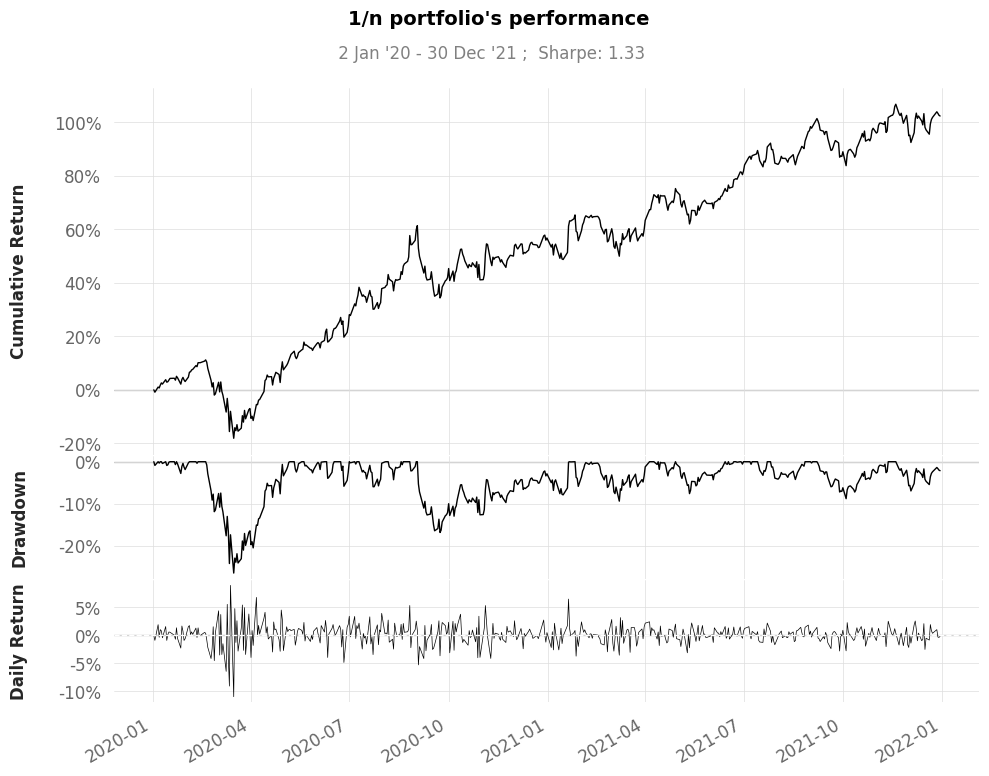

In [17]:
# Generate basic performance evaluation plots:
qs.plots.snapshot(portfolio_returns,
 title="1/n portfolio's performance",
 grayscale=True)
# we generated a figure containing basic portfolio evaluation plots using the quantstats library.
# Cumulative returns plot: It presents the evolution of the portfolio’s worth over time.

# Underwater plot: This plot presents the investment from a pessimistic point of view, as it
# focuses on losses. It plots all the drawdown periods and how long they lasted, that is, until
# the value rebounded to a new high. One of the insights we can draw from this is how long the
# periods of losses lasted.

In [18]:
# Calculate the basic portfolio evaluation metrics:
qs.reports.metrics(portfolio_returns,
 benchmark="SPY",
 mode="basic",
 prepare_returns=False)

# Lastly, we generated portfolio evaluation metrics. While doing so, we also provided a benchmark.
# We chose the SPY, which is an exchange-traded fund (ETF) designed to follow the S&P 500 index.
# We could provide the benchmark as either the ticker or a pandas DataFrame/Series containing the prices/ returns. The library can handle both options.

[*********************100%%**********************]  1 of 1 completed
                    Benchmark (SPY)    Strategy
------------------  -----------------  ----------
Start Period        2020-01-03         2020-01-03
End Period          2021-12-30         2021-12-30
Risk-Free Rate      0.0%               0.0%
Time in Market      100.0%             100.0%

Cumulative Return   47.69%             104.18%
CAGR﹪              14.47%             28.07%

Sharpe              0.9                1.34
Prob. Sharpe Ratio  89.13%             96.83%
Sortino             1.23               1.93
Sortino/√2          0.87               1.36
Omega               1.27               1.27

Max Drawdown        -34.1%             -26.35%
Longest DD Days     180                140

Gain/Pain Ratio     0.2                0.27
Gain/Pain (1M)      1.44               3.42

Payoff Ratio        0.79               0.84
Profit Factor       1.2                1.27
Common Sense Ratio  0.96               1.2
CPC Index      

In [ ]:
# ^^^^^
# • Sharpe ratio: One of the most popular performance evaluation metrics, it measures the excess
# return (over the risk-free rate) per unit of standard deviation. When no risk-free rate is provided,
# the default assumption is that it is equal to 0%. The greater the Sharpe ratio, the better the portfolio’s risk-adjusted performance.

# • Sortino ratio: A modified version of the Sharpe ratio, where the standard deviation in the denominator is replaced with downside deviation.

# • Omega ratio: The probability-weighted ratio of gains over losses for a determined return
# target threshold (default set to 0). Its main advantage over the Sharpe ratio is that the Omega
# ratio—by construction—considers all moments of the returns distribution, while the former
# only considers the first two (mean and variance).

# • Max drawdown: A metric of the downside risk of a portfolio, it measures the largest peak-to-valley loss (expressed as a percentage)
# during the course of the investment. The lower the maximum drawdown, the better.

# Tail ratio: The ratio (absolute) between the 95th and 5th percentile of the daily returns. A tail
# ratio of ~0.8 means that losses are ~1.25 times as bad as profits.

There is more...
quantstats allows us to generate a complete HTML report containing all of the available plots and
metrics (including a comparison to the benchmark). We can create such a report using the following
command:

In [ ]:
qs.reports.html(portfolio_returns,
                benchmark="SPY",
                title="1/n portfolio",
                download_filename="EW portfolio evaluation.html",
                )

• Calmar ratio: The ratio is defined as the average annual compounded rate of return divided by
the maximum drawdown for that same time period. The higher the ratio, the better.

• Skew: Skewness measures the degree of asymmetry, that is, how much is the given distribution
(here, of portfolio returns) more skewed than the Normal distribution. Negative skewness
(left-skewed distributions) means  that large negative returns occur more frequently than large
positive ones.

• Kurtosis: It measures extreme values in either of the tails. Distributions with large kurtosis
exhibit tail data exceeding the tails of the Gaussian distribution, meaning that large and small
returns occur more frequently.

• Alpha: It describes a strategy’s ability to beat the market. In other words, it is the portfolio
excess returns above the benchmark return.

• Beta: It measures the overall systematic risk of a portfolio of investments. In other words, it
is a measure of portfolio volatility compared to the systematic risk of the entire market. A
portfolio’s beta is equal to the weighted average of the beta coefficients of all the individual
assets in a portfolio.